<a href="https://colab.research.google.com/github/ji-min000/b06/blob/feature%2FML/%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC%EB%B3%84_%EC%9B%94%EB%B3%84_%EB%A7%A4%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [77]:
data = pd.read_csv( '/content/drive/MyDrive/01. 원본 테이블에서 날짜형식(yy-mm-dd)로 변환.csv' , encoding='windows-1252')
data.head(2)

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020.1.1,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020.1.1,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606


In [78]:
data['formatted_order_date'] = pd.to_datetime(data['formatted_order_date'])
data['month'] = data['formatted_order_date'].dt.month
data.head(2)

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,1
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,1


# 카테고리기준/ 월별 매출 증가/ **Furniture **

In [79]:
ca_furn = 'Category'
df_furn = data[data[ca_furn] == 'Furniture']
df_furn.head(3)

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,1
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,1
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,1


In [80]:
df_furn['sales_total'] = df_furn['Sales']*df_furn['Quantity']
data_month = df_furn.groupby('month').agg({'Order ID': 'count', 'sales_total': 'sum'})
data_month.head(2)

<ipython-input-80-88dc8a41aecb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_furn['sales_total'] = df_furn['Sales']*df_furn['Quantity']


,Order ID,sales_total
month,,
1,24,24660.8140
2,26,25060.3964


In [81]:
data_month.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='month')

In [82]:
dfX= pd.DataFrame(data_month['month'])
dfy = pd.DataFrame(data_month['sales_total'])

In [83]:
df = pd.concat([dfX, dfy], axis=1)
df

,month,sales_total
0,1,24660.8140
1,2,25060.3964
2,3,49314.3476
3,4,42510.7459
4,5,85900.4570
5,6,82668.8191
6,7,49550.9820
7,8,84257.7020
8,9,153310.0400
9,10,104245.4426


In [84]:
model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(dfX, dfy, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 293ms/step - loss: 11170024448.0000 - mse: 11170024448.0000
Epoch 2/300
1/1 [==============================] - 0s 12ms/step - loss: 848086848.0000 - mse: 848086848.0000
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 746885568.0000 - mse: 746885568.0000
Epoch 4/300
1/1 [==============================] - 0s 13ms/step - loss: 745850048.0000 - mse: 745850048.0000
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 745796544.0000 - mse: 745796544.0000
Epoch 6/300
1/1 [==============================] - 0s 8ms/step - loss: 745752896.0000 - mse: 745752896.0000
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 745709824.0000 - mse: 745709824.0000
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 745667072.0000 - mse: 745667072.0000
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 745624832.0000 - mse: 745624832.0000
Epoch 10/300
1/1 [

1/1 [==============================] - 0s 45ms/step


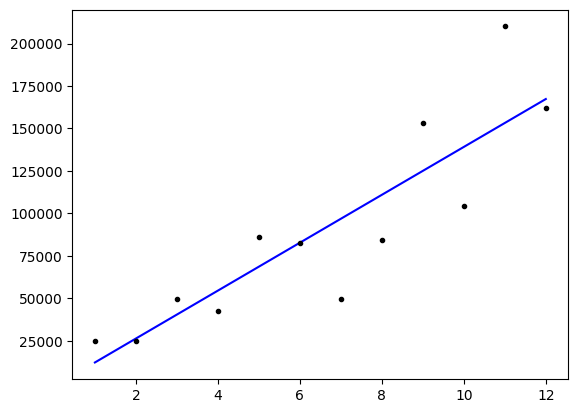

In [85]:
plt.plot(dfX, model.predict(dfX), 'b', dfX, dfy, 'k.')

In [86]:
import numpy as np

input_data = np.array([1]).reshape(1, 1)

print(model.predict(input_data))

1/1 [==============================] - 0s 21ms/step
[[12206.998]]


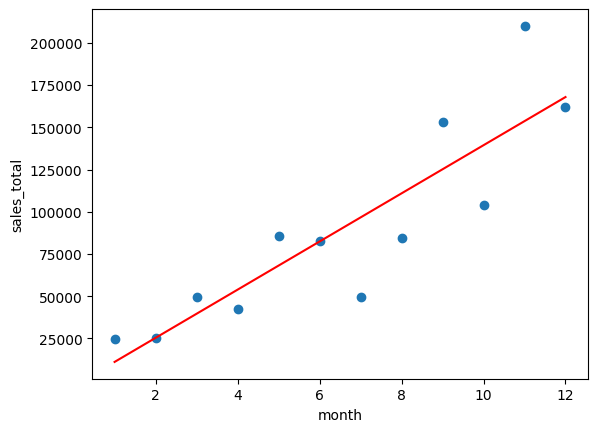

R^2: 0.7658838135913977


In [87]:
from sklearn.linear_model import LinearRegression

# 데이터 프레임 생성
df2 = pd.concat([dfX, dfy], axis=1)

# 산점도 그리기
plt.scatter(dfX, dfy)
plt.xlabel("month")
plt.ylabel("sales_total")

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(dfX, dfy)

# 예측값 계산
predicted_orders = model.predict(dfX)

# 선형 회귀선 그리기
plt.plot(dfX, predicted_orders, color="red")

# 그래프 출력
plt.show()

# 모델 평가
print("R^2:", model.score(dfX, dfy))




In [88]:
for month, sales_total in zip(df['month'], predicted_orders):
    print(f"{month}월의 예상 총매출: {sales_total[0]:.0f}")

1월의 예상 총매출: 11046
2월의 예상 총매출: 25307
3월의 예상 총매출: 39567
4월의 예상 총매출: 53828
5월의 예상 총매출: 68088
6월의 예상 총매출: 82348
7월의 예상 총매출: 96609
8월의 예상 총매출: 110869
9월의 예상 총매출: 125129
10월의 예상 총매출: 139390
11월의 예상 총매출: 153650
12월의 예상 총매출: 167911


# 카테고리기준/ 월별 매출 증가/ **Office Supplies	**

In [89]:
ca_furn2 = 'Category'
df_furn2 = data[data[ca_furn] == 'Office Supplies']
df_furn2.head(3)

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,1
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,1
6,2020-01-01,8073,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-AR-10003158,Office Supplies,Art,Fluorescent Highlighters by Dixon,12.736,4,0.2,2.2288,1


In [90]:
df_furn2['sales_total'] = df_furn2['Sales']*df_furn2['Quantity']
data_month2 = df_furn2.groupby('month').agg({'Order ID': 'count', 'sales_total': 'sum'})
data_month2.head(2)

<ipython-input-90-238202c193c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_furn2['sales_total'] = df_furn2['Sales']*df_furn2['Quantity']


,Order ID,sales_total
month,,
1,100,107966.295
2,59,36004.356


In [91]:
data_month2.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='month')

In [92]:
dfX2= pd.DataFrame(data_month2['month'])
dfy2 = pd.DataFrame(data_month2['sales_total'])

In [93]:
df2 = pd.concat([dfX2, dfy2], axis=1)
df2

,month,sales_total
0,1,107966.295
1,2,36004.356
2,3,60595.968
3,4,58771.169
4,5,62731.412
5,6,90253.913
6,7,45131.010
7,8,181162.166
8,9,147808.851
9,10,121607.184


In [94]:
model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(dfX2, dfy2, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 324ms/step - loss: 12933324800.0000 - mse: 12933324800.0000
Epoch 2/300
1/1 [==============================] - 0s 9ms/step - loss: 1653960320.0000 - mse: 1653960320.0000
Epoch 3/300
1/1 [==============================] - 0s 8ms/step - loss: 1540903040.0000 - mse: 1540903040.0000
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 1537299456.0000 - mse: 1537299456.0000
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 1534790528.0000 - mse: 1534790528.0000
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 1532313216.0000 - mse: 1532313216.0000
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 1529857664.0000 - mse: 1529857664.0000
Epoch 8/300
1/1 [==============================] - 0s 10ms/step - loss: 1527423488.0000 - mse: 1527423488.0000
Epoch 9/300
1/1 [==============================] - 0s 12ms/step - loss: 1525010048.0000 - mse: 1525010048.0000
Ep

1/1 [==============================] - 0s 106ms/step


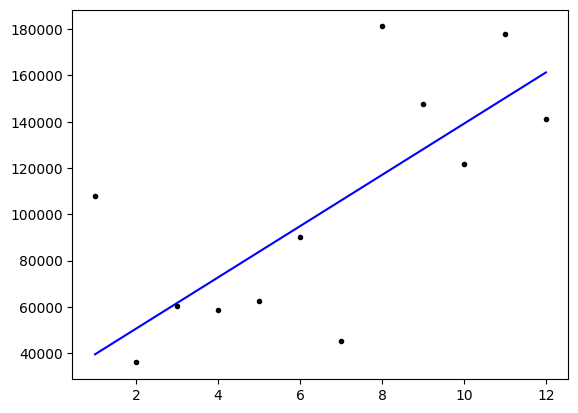

In [95]:
plt.plot(dfX2, model.predict(dfX2), 'b', dfX2, dfy2, 'k.')

In [96]:
import numpy as np

input_data = np.array([1]).reshape(1, 1)

print(model.predict(input_data))

1/1 [==============================] - 0s 34ms/step
[[39529.22]]


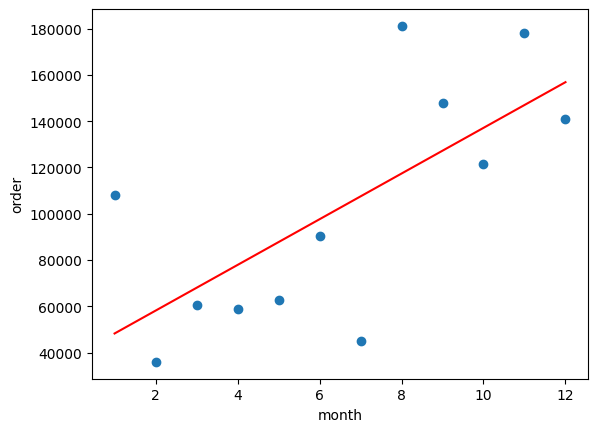

R^2: 0.4818238070378793


In [97]:
from sklearn.linear_model import LinearRegression

# 데이터 프레임 생성
df2 = pd.concat([dfX2, dfy2], axis=1)

# 산점도 그리기
plt.scatter(dfX2, dfy2)
plt.xlabel("month")
plt.ylabel("order")

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(dfX2, dfy2)

# 예측값 계산
predicted_orders = model.predict(dfX2)

# 선형 회귀선 그리기
plt.plot(dfX2, predicted_orders, color="red")

# 그래프 출력
plt.show()

# 모델 평가
print("R^2:", model.score(dfX2, dfy2))



In [98]:
for month, sales_total in zip(df['month'], predicted_orders):
    print(f"{month}월의 예상 총매출: {sales_total[0]:.0f}")

1월의 예상 총매출: 48290
2월의 예상 총매출: 58161
3월의 예상 총매출: 68031
4월의 예상 총매출: 77902
5월의 예상 총매출: 87773
6월의 예상 총매출: 97643
7월의 예상 총매출: 107514
8월의 예상 총매출: 117384
9월의 예상 총매출: 127255
10월의 예상 총매출: 137126
11월의 예상 총매출: 146996
12월의 예상 총매출: 156867


# 카테고리기준/ 월별 매출 증가/ *Technology *

In [99]:
ca_furn3 = 'Category'
df_furn3 = data[data[ca_furn3] == 'Technology']
df_furn3.head(3)

,formatted_order_date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month
10,2020-01-02,1341,CA-2017-113481,First Class,AS-10045,Corporate,United States,Jacksonville,North Carolina,28540,South,TEC-MA-10002178,Technology,Machines,Cisco CP-7937G Unified IP Conference Station P...,695.700,2,0.5,-27.8280,1
17,2020-01-02,9686,CA-2017-118668,Second Class,FW-14395,Corporate,United States,Los Angeles,California,90032,West,TEC-AC-10000682,Technology,Accessories,Kensington K72356US Mouse-in-a-Box USB Desktop...,16.590,1,0.0,5.8065,1
22,2020-01-07,978,CA-2017-159366,First Class,BW-11110,Corporate,United States,Detroit,Michigan,48205,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,3059.982,2,0.1,679.9960,1


In [100]:
df_furn3['sales_total'] = df_furn3['Sales']*df_furn3['Quantity']
data_month3 = df_furn3.groupby('month').agg({'Order ID': 'count', 'sales_total': 'sum'})
data_month3.head(2)

<ipython-input-100-a850b1d8cabd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_furn3['sales_total'] = df_furn3['Sales']*df_furn3['Quantity']


,Order ID,sales_total
month,,
1,31,71205.513
2,22,26698.232


In [101]:
data_month3.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='month')

In [102]:
dfX3= pd.DataFrame(data_month3['month'])
dfy3 = pd.DataFrame(data_month3['sales_total'])

In [103]:
df3 = pd.concat([dfX3, dfy3], axis=1)
df3

,month,sales_total
0,1,71205.513
1,2,26698.232
2,3,141614.372
3,4,44914.011
4,5,67827.892
5,6,95063.444
6,7,119128.050
7,8,128455.858
8,9,116400.965
9,10,171333.887


In [104]:
model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(dfX3, dfy3, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 367ms/step - loss: 13948473344.0000 - mse: 13948473344.0000
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 2160926464.0000 - mse: 2160926464.0000
Epoch 3/300
1/1 [==============================] - 0s 9ms/step - loss: 2041465856.0000 - mse: 2041465856.0000
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 2036388480.0000 - mse: 2036388480.0000
Epoch 5/300
1/1 [==============================] - 0s 9ms/step - loss: 2032466304.0000 - mse: 2032466304.0000
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 2028588672.0000 - mse: 2028588672.0000
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 2024744576.0000 - mse: 2024744576.0000
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 2020934528.0000 - mse: 2020934528.0000
Epoch 9/300
1/1 [==============================] - 0s 12ms/step - loss: 2017156992.0000 - mse: 2017156992.0000
Epo

1/1 [==============================] - 0s 73ms/step


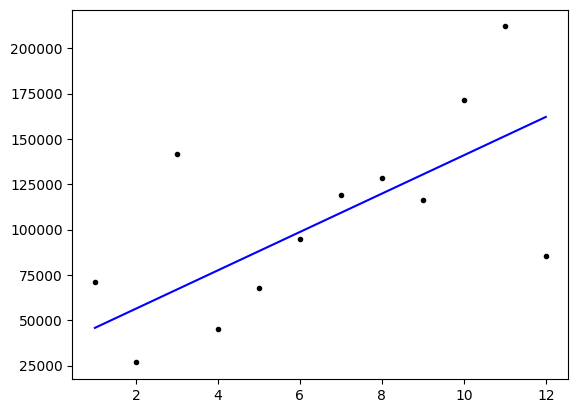

In [105]:
plt.plot(dfX3, model.predict(dfX3), 'b', dfX3, dfy3, 'k.')

In [106]:
import numpy as np

input_data = np.array([1]).reshape(1, 1)

print(model.predict(input_data))

1/1 [==============================] - 0s 35ms/step
[[45790.457]]


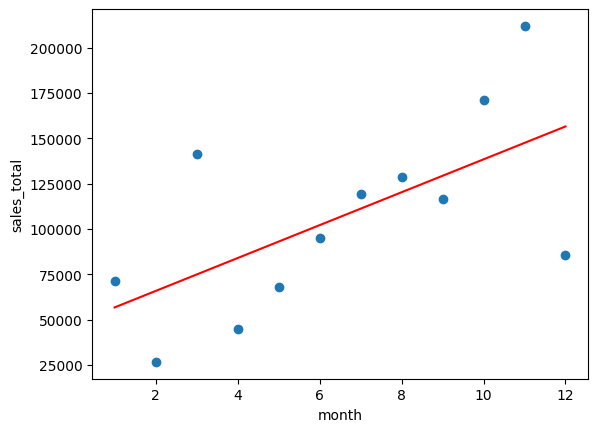

R^2: 0.3826069986977175


In [107]:
from sklearn.linear_model import LinearRegression

# 데이터 프레임 생성
df3 = pd.concat([dfX3, dfy3], axis=1)

# 산점도 그리기
plt.scatter(dfX3, dfy3)
plt.xlabel("month")
plt.ylabel("sales_total")

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(dfX3, dfy3)

# 예측값 계산
predicted_orders = model.predict(dfX3)

# 선형 회귀선 그리기
plt.plot(dfX, predicted_orders, color="red")

# 그래프 출력
plt.show()

# 모델 평가
print("R^2:", model.score(dfX3, dfy3))



In [113]:
# 이상치 제거
# Z-score 계산
z = np.abs(state.zscore(df3.select_dtypes(include=[np.number])))
print(z)
# 이상치 제거를 위한 임계값 설정 (예: Z-score가 3을 초과하는 데이터 포인트 제거)
threshold = 2
df3_tm = df3[(z < threshold).all(axis=1)]
print(f"Original data shape: {df3.shape}")
print(f"Cleaned data shape: {df3_tm.shape}")

AttributeError: 'str' object has no attribute 'zscore'